In [4]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import sys
import sympy as sp

sys.path.insert(0, '../')
from AircraftIden import FreqIdenSIMO, TransferFunctionFit, TransferFunctionParamModel
from AircraftIden.TransferFunctionFit import plot_fitter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
arr = np.load("../data/sweep_data_2017_11_16_11_47.npy")
time_seq_source = arr[:, 0] # Time series
ele_seq_source = arr[:, 1] # elevator input
q_seq_source = arr[:, 4] # angular velocity output
vvi_seq_source = arr[:,6] # verticle velocity output
theta_seq_source = arr[:,2] # pitch angle output
airspeed_seq = arr[:, 3] # airspeed output
simo_iden = FreqIdenSIMO(time_seq_source, 0.1, 50, ele_seq_source, q_seq_source,theta_seq_source,airspeed_seq, win_num=None)

Sample rate is 46.70436437941652
Sample rate is 46.70436437941652
Setting-up composite win, sample rate 46.70436437941652 from omg 0.1 to 50
Composite using [5, 61, 117, 173, 229]
Setting-up composite win, sample rate 46.70436437941652 from omg 0.1 to 50
Composite using [5, 61, 117, 173, 229]
Setting-up composite win, sample rate 46.70436437941652 from omg 0.1 to 50
Composite using [5, 61, 117, 173, 229]


No handles with labels found to put in legend.
No handles with labels found to put in legend.


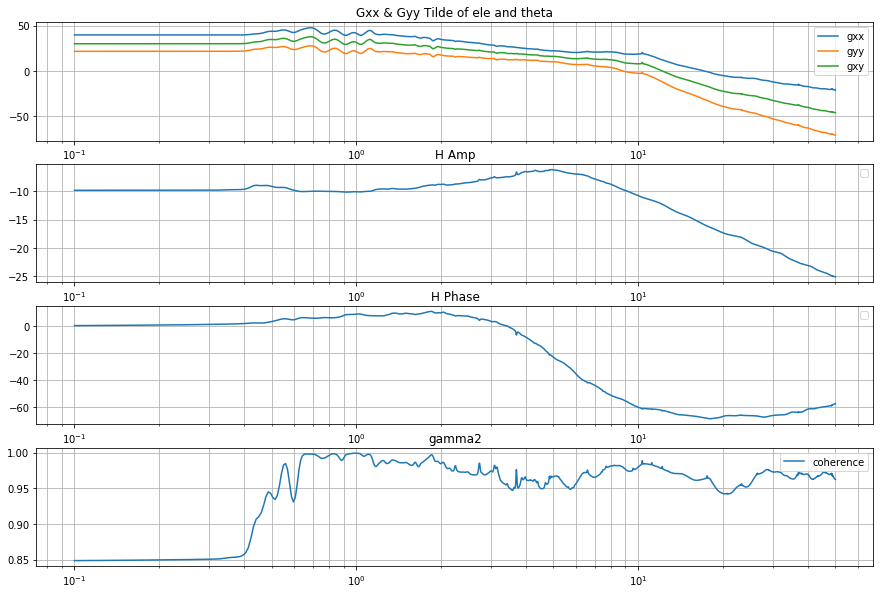

No handles with labels found to put in legend.
No handles with labels found to put in legend.


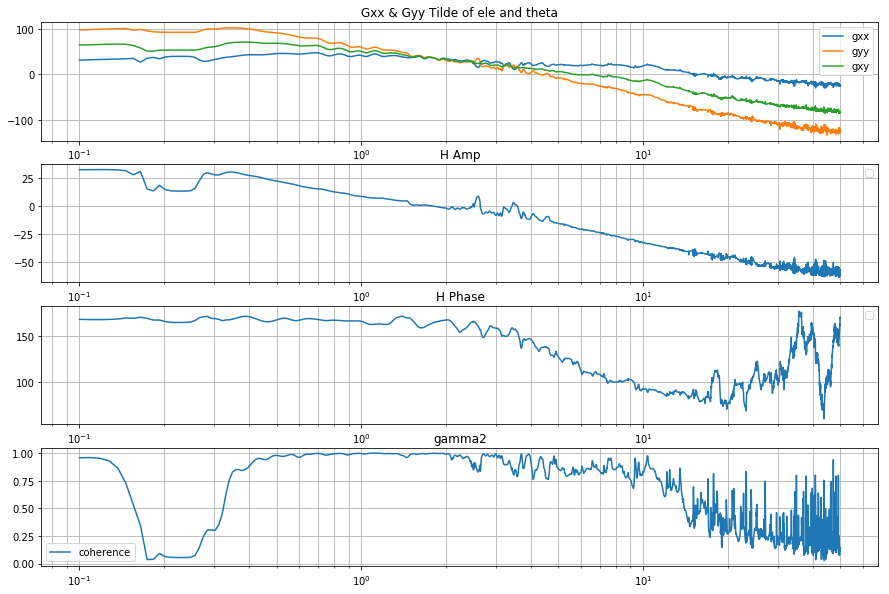

In [6]:
plt.rc("figure", figsize=(15,10))
plt.figure("ele->q")
simo_iden.plt_bode_plot(0)
plt.show()


plt.figure("ele->airspeed")
simo_iden.plt_bode_plot(2)
# Airspeed response is mainly at low frequency domain
plt.show()

## Fitting transfer function
Use sympy to present your transfer function and fit it!

A good estimation usually gives cost less than 15~20

Here we fit the elevator to pitch rate as a second order system with a latency

$$\frac{d}{a s^2 + b s +c} e^{-\tau s}$$

Uknown number 6 [a, d, e, c, tau, b]
Found new better 13.184803720978579


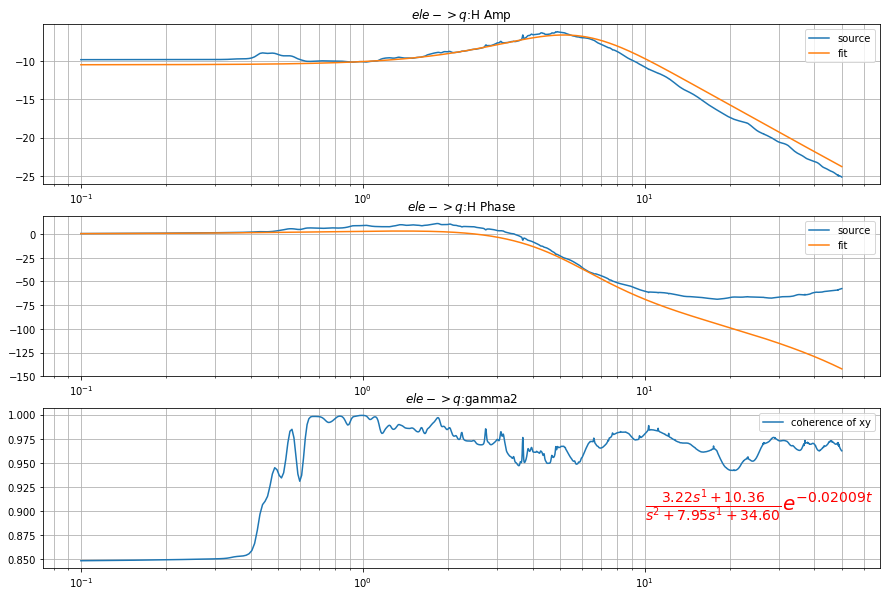

In [8]:
freq, H, gamma2, gxx, gxy, gyy = simo_iden.get_freq_iden(0)
a, b, c, d, e, f, g, tau, s = sp.symbols("a b c d e f g tau s")
num = d*s+e
den = a*s*s + b*s + c
tfpm = TransferFunctionParamModel(num, den, tau)
fitter = TransferFunctionFit(freq, H, gamma2, tfpm, nw=20, iter_times=50, reg = 0.1)
tf = fitter.estimate(0.1, 10, accept_J=15)
plot_fitter(fitter, "$ele -> q$")